<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data-reading-and-cleaning" data-toc-modified-id="Data-reading-and-cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data reading and cleaning</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting</a></span></li></ul></div>

# Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

# Data reading and cleaning

In [4]:
data_clusters = pd.read_csv('/Users/ewawesolowska/Documents/Data_Analytics/Final project/df_with_clusters')

In [5]:
data_clusters.drop(data_clusters[data_clusters.geo == 'EU27_2020'].index, inplace=True)

In [6]:
data_clusters = data_clusters.reset_index()

In [7]:
data_clusters

,index,geo,Country,Obesity_2014,Obesity_2019,asthma_2019,CHR_LW_RES_2019,DIAB_2019,DPR_CHR_2019,HBLPR_2019,...,personnel_2018,hosp_beds2014,hosp_beds2018,unempl2019,int_access2019,no_job_no_edu,income2019,KMedoids_labels,KMedoids_Health,KMedoids_Economy
0,0,AT,Austria,-1.271354,-0.596124,-0.487321,0.647228,-0.616332,0.119167,-0.175130,...,2.812849,1.476697,1.392267,0.454833,0.259317,-0.896407,0.878553,1,1,2
1,1,BE,Belgium,-0.932822,-1.012370,0.337981,0.250387,-0.728030,0.059046,-0.904048,...,-1.079331,0.425292,0.392381,-0.806685,0.259317,-0.006182,0.490378,1,2,3
2,2,BG,Bulgaria,0.291100,-0.034192,-1.642744,-0.278733,-0.113692,-1.323715,1.133610,...,0.925000,1.201101,1.572637,0.034327,-2.206385,1.156056,-1.215361,0,0,1
3,3,CY,Cyprus,-1.193231,-1.095619,-0.652381,-0.477154,-0.057843,-0.722514,-0.655553,...,0.659783,-1.052950,-1.086894,0.234568,0.259317,0.438930,0.221611,1,2,0
4,4,CZ,Czechia,1.020245,1.027236,-0.322261,-0.940134,0.947436,-0.812695,0.570355,...,0.594170,0.925868,0.996120,1.155676,-0.233824,0.092732,-0.723302,3,0,2
5,5,DE,Germany,-0.203677,-0.325564,1.548423,1.507049,0.891587,1.351628,0.553788,...,1.097879,1.867727,1.823882,1.215748,1.081217,-0.871679,0.682923,1,0,3
6,6,DK,Denmark,-1.349477,-0.970745,1.108262,-0.146453,-1.007274,0.870667,-0.655553,...,0.883163,-1.494171,-1.432962,0.755194,1.081217,-0.698579,1.459471,1,1,3
7,7,EE,Estonia,0.265059,0.340430,-0.597361,-0.741714,-0.616332,-0.031134,0.073365,...,-0.427255,-0.155032,-0.266954,1.135652,0.259317,-0.302924,-0.604192,0,0,2
8,8,EL,Greece,0.994204,0.527741,-1.037522,-1.138554,0.500645,-0.993055,-0.539589,...,0.110108,-0.554073,-0.471393,-2.668924,-1.548864,1.947367,-0.915150,2,0,0
9,9,ES,Spain,-0.125554,-0.283939,-0.597361,-0.609434,0.221401,-0.421914,-0.589288,...,0.563207,-1.325755,-1.214820,-1.307287,0.423697,0.785129,-0.012925,1,2,0


In [8]:
data_only_clusters = data_clusters.iloc[:,-3:]

In [9]:
data_only_clusters[['geo', 'Country']] = data_clusters.iloc[:,0:2]

In [10]:
deaths = pd.read_csv('/Users/ewawesolowska/Documents/Data_Analytics/Final project/deaths_groups')

In [11]:
data_only_clusters['deaths'] = deaths['excessive_groups']

In [12]:
# I will clean Economy clusters

def label_rows(row):
    if row['KMedoids_Economy'] == 1:
        val = 10
    elif row['KMedoids_Economy'] == 2:
        val = 20
    elif row['KMedoids_Economy'] == 0:
        val = 30
    else:
        val = 40
    return val

In [13]:
data_only_clusters['Clusters_economy'] = data_only_clusters.apply(label_rows, axis = 1)

In [14]:
data_only_clusters

,KMedoids_labels,KMedoids_Health,KMedoids_Economy,geo,Country,deaths,Clusters_economy
0,1,1,2,0,AT,2,20
1,1,2,3,1,BE,2,40
2,0,0,1,2,BG,4,10
3,1,2,0,3,CY,1,30
4,3,0,2,4,CZ,4,20
5,1,0,3,5,DE,1,40
6,1,1,3,6,DK,1,40
7,0,0,2,7,EE,2,20
8,2,0,0,8,EL,1,30
9,1,2,0,9,ES,2,30


# Plotting 

In [15]:
palette1 = {1:"green", 2:"lightgreen", 3:"yellow", 4: 'red'}

In [16]:
new = data_only_clusters.groupby(['Clusters_economy','KMedoids_Health', 'deaths'])['geo'].agg('count').reset_index()
display(new)

,Clusters_economy,KMedoids_Health,deaths,geo
0,10,0,2,1
1,10,0,3,3
2,10,0,4,4
3,20,0,1,1
4,20,0,2,2
5,20,0,4,1
6,20,1,2,1
7,30,0,1,1
8,30,2,1,1
9,30,2,2,1


In [17]:
new.geo.sum()

27

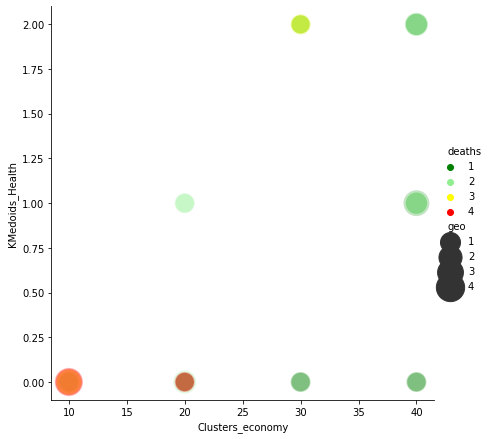

In [18]:
sns.relplot(x="Clusters_economy", y="KMedoids_Health", hue="deaths", size="geo",
            sizes=(400, 800), alpha=.5, palette=palette1,
            height=6, data=new)

In [19]:
new1 = data_only_clusters.groupby(['Clusters_economy', 'deaths'])['geo'].agg('count').reset_index()
display(new1)

,Clusters_economy,deaths,geo
0,10,2,1
1,10,3,3
2,10,4,4
3,20,1,1
4,20,2,3
5,20,4,1
6,30,1,2
7,30,2,1
8,30,3,1
9,40,1,6


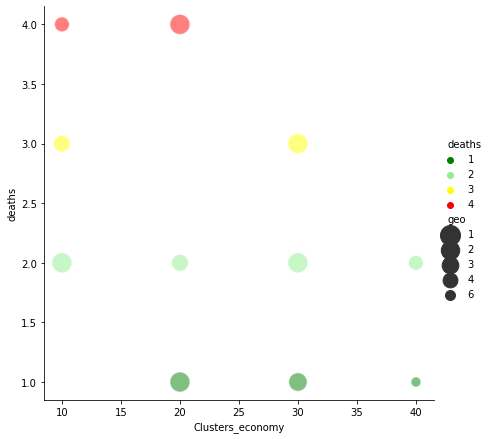

In [20]:
sns.relplot(x="Clusters_economy", y="deaths", hue="deaths", size="geo",
            sizes=(400, 100), alpha=.5, palette=palette1,
            height=6, data=new1)

In [21]:
new2 = data_only_clusters.groupby(['Clusters_economy', 'deaths'])['geo'].agg('count').reset_index()
display(new2)

,Clusters_economy,deaths,geo
0,10,2,1
1,10,3,3
2,10,4,4
3,20,1,1
4,20,2,3
5,20,4,1
6,30,1,2
7,30,2,1
8,30,3,1
9,40,1,6


In [22]:
table = pd.pivot_table(data_only_clusters, values='geo', index=['deaths'],
                    columns=['KMedoids_Health'], aggfunc='count', fill_value=0)

In [23]:
table_E = pd.pivot_table(data_only_clusters, values='geo', index=['deaths'],
                    columns=['Clusters_economy'], aggfunc='count', fill_value=0)

In [24]:
table

KMedoids_Health,0,1,2
deaths,,,
1,3,3,3
2,3,3,3
3,3,0,1
4,5,0,0


In [25]:
table_E

Clusters_economy,10,20,30,40
deaths,,,,
1,0,1,2,6
2,1,3,1,4
3,3,0,1,0
4,4,1,0,0


In [26]:
x_labels_H = ['Change needed', 'Room for improvement', 'Well done']

In [27]:
y_labels = ['below 100', '100-200', '200-300', 'over 400']

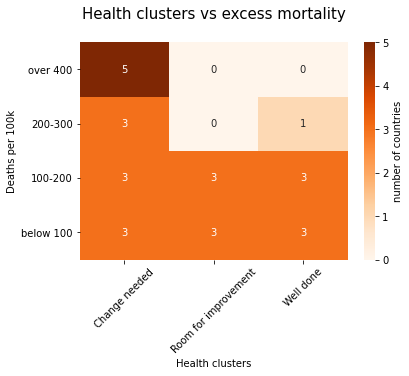

In [28]:
sns.heatmap(table, annot=True, fmt="d", cmap="Oranges", xticklabels = x_labels_H, yticklabels = y_labels, cbar_kws={'label': 'number of countries'})
plt.ylim(0,4)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Health clusters', fontsize = 10)
plt.ylabel('Deaths per 100k', fontsize = 10)
plt.title('Health clusters vs excess mortality', y=1.08, fontsize = 15)
#plt.xlim(0,NX)
plt.show()

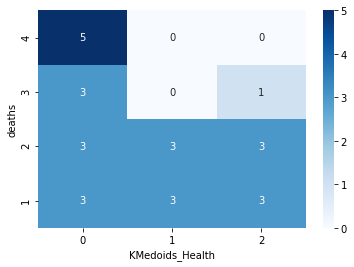

In [29]:

sns.heatmap(table, annot=True, fmt="d", cmap="Blues")
plt.ylim(0,4)
#plt.xlim(0,NX)
plt.show()

In [30]:
x_labels_E = ['Not afluent', 'Average lower', 'Average higher', 'Afluent']

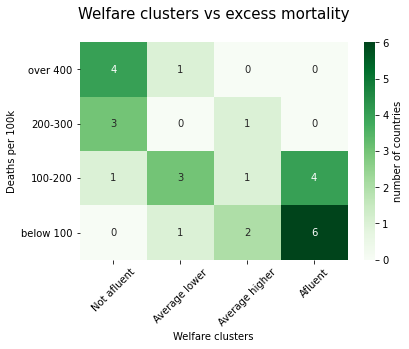

In [31]:
sns.heatmap(table_E, annot=True, fmt="d", cmap="Greens", xticklabels = x_labels_E, yticklabels = y_labels, cbar_kws={'label': 'number of countries'})
plt.ylim(0,4)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Welfare clusters', fontsize = 10)
plt.ylabel('Deaths per 100k', fontsize = 10)
plt.title('Welfare clusters vs excess mortality', y=1.08, fontsize = 15)
#plt.xlim(0,NX)
plt.show()